In [6]:
import json
train_coco = None
val_coco = None
test_coco = None
train_json = "/scratch1/rsawahn/data/PeopleOnGrass/annotations/instances_train.json"
val_json = "/scratch1/rsawahn/data/PeopleOnGrass/annotations/instances_val.json"
#test_json = "/scratch1/rsawahn/data/sw/coco/annotations/instances_test.json"
with open(train_json, "r") as f:
    train_coco = json.load(f)

with open(val_json, "r") as f:
    val_coco = json.load(f)
    
    
all_coco = [train_coco, val_coco]
ds_names = ["train", "val"]

print(train_coco.keys(), val_coco.keys())
print(train_coco["categories"], val_coco["categories"])

# print all keys used in annotations as a set
all_keys = set()
for ds in all_coco:
    for img in ds["images"]:
        all_keys.update(img.keys())
print(all_keys)

all_img_ids = []
for ds in all_coco:
    all_img_ids.extend([img["id"] for img in ds["images"]])

print(len(all_img_ids), len(set(all_img_ids)))

dict_keys(['annotations', 'categories', 'images', 'type']) dict_keys(['annotations', 'categories', 'images', 'type'])
[{'id': 0, 'name': 'Pedestrian', 'supercategory': None}] [{'id': 0, 'name': 'Pedestrian', 'supercategory': None}]
{'roll_deg', 'gimbal_heading', 'height', 'pitch_deg', 'file_name', 'altitude_sea_lvl', 'width', 'id', 'gimbal_pitch', 'altitude'}
2892 2892


Average tiny size:  353.5679012345679


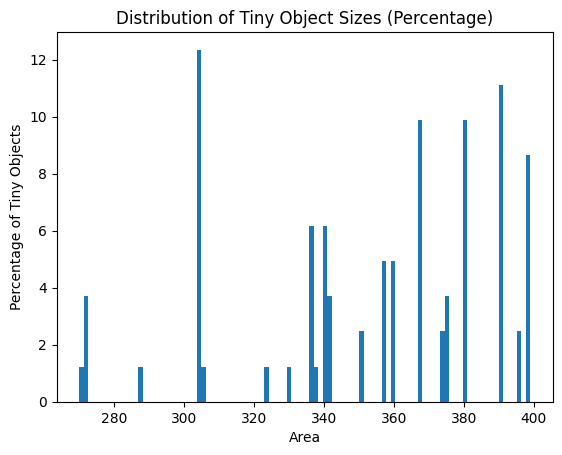

{'large': 1438, 'medium': 7408, 'small': 4786, 'tiny': 81}
total number of annotations:  13713


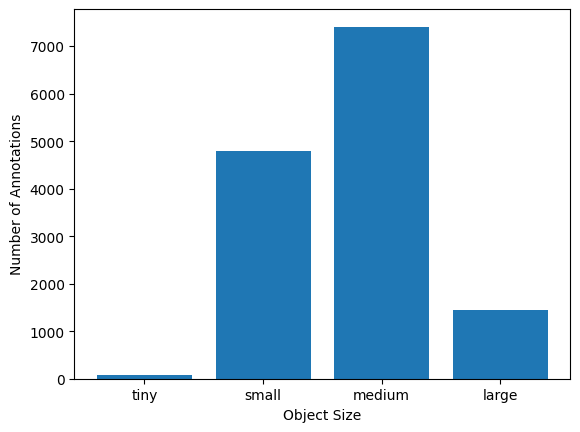

In [7]:
# general object sizes analysis
import numpy as np
def get_size_name(area):
    if area < 20*20:
        return "tiny"
    if area < 32*32:
        return "small"
    if area < 96*96:
        return "medium"
    else:
        return "large"
    
def compute_area(bbox):
    return bbox[2]*bbox[3]

size_counts = {}
tiny_sizes = []
for coco in all_coco:
    for ann in coco["annotations"]:
        size_name = get_size_name(compute_area(ann["bbox"]))
        if size_name == "tiny":
            tiny_sizes.append(compute_area(ann["bbox"]))
        if size_name not in size_counts:
            size_counts[size_name] = 0
        size_counts[size_name] += 1

print("Average tiny size: ", sum(tiny_sizes)/len(tiny_sizes))

# Compute the total number of tiny objects
total_tiny_objects = len(tiny_sizes)

# Compute the histogram of tiny sizes
hist, bins = np.histogram(tiny_sizes, bins=100)

# Convert counts to percentages
hist_percentage = hist / total_tiny_objects * 100

import matplotlib.pyplot as plt

plt.hist(tiny_sizes, bins=100, weights=np.ones(len(tiny_sizes)) / total_tiny_objects * 100)
plt.xlabel("Area")
plt.ylabel("Percentage of Tiny Objects")
plt.title("Distribution of Tiny Object Sizes (Percentage)")
plt.show()

print(size_counts)
print("total number of annotations: ", sum(size_counts.values()))
# sort the size counts from tiny small medium large
size_counts = dict(sorted(size_counts.items()))
# reverse 
size_counts = dict(reversed(list(size_counts.items())))

# create a visiualization of the distribution of object sizes
import matplotlib.pyplot as plt
import numpy as np
# add labels to x and y axis
plt.xlabel("Object Size")
plt.ylabel("Number of Annotations")
# create a bar chart
plt.bar(size_counts.keys(), size_counts.values())
# display the plot
plt.show()

In [9]:
print(len(train_coco["images"]) + len(val_coco["images"]))

2892


In [1]:
import PIL
from PIL import Image
import os

widths = []
heights = []
base = "/scratch1/rsawahn/data/PeopleOnGrass/train"

for img in os.listdir(base):
    if os.path.isdir(os.path.join(base, img)):
        continue
    img_path = os.path.join(base, img) # Making image file path
    im = Image.open(img_path)
    widths.append(im.size[0])
    heights.append(im.size[1])

AVG_HEIGHT = round(sum(heights)/len(heights))
AVG_WIDTH = round(sum(widths)/len(widths))

IsADirectoryError: [Errno 21] Is a directory: '/scratch1/rsawahn/data/PeopleOnGrass/train/cache'